## Support Vector Regression on Position Salaries Dataset
In this notebook, we will perform a support vector regression (SVR) analysis using a dataset containing position levels and their corresponding salaries. We will:
1. Import necessary libraries.
2. Load the dataset.
3. Explore the dataset.
4. Extract features and target variables.
5. Scale the features and target variable.
6. Train the SVR model.
7. Make predictions.
8. Visualize the results.


### Step 1: Importing Libraries
We import the necessary libraries for data manipulation (`pandas`), numerical operations (`numpy`), visualization (`matplotlib`), and machine learning (`sklearn` for SVR and scaling).


In [1]:
# Step 1: Import necessary libraries
# We will use numpy for numerical operations, pandas for data manipulation, and matplotlib for plotting.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


### Step 2: Loading the Dataset
In this step, we load the dataset from a CSV file into a Pandas DataFrame for easier manipulation and analysis.


In [2]:
# Step 2: Load the dataset
# We will read the 'Position_Salaries.csv' file into a Pandas DataFrame.
dataset = pd.read_csv('Position_Salaries.csv')


### Step 3: Exploring the Dataset
Here, we examine the first few rows of the dataset to get a sense of its structure and the information it contains, including position levels and salaries.


In [3]:
# Step 3: Explore the dataset
# Display the first few rows of the dataset to understand its structure.
dataset.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


### Step 4: Extracting Features and Target Variable
We extract the position levels as our feature set (X) and the corresponding salaries as our target variable (Y). The target variable is reshaped for compatibility with the SVR model.


In [4]:
# Step 4: Extract features (X) and target (Y)
# We will extract the position levels as features (X) and salaries as the target variable (Y).
X = dataset.iloc[:, 1:2].values  # Position levels
Y = dataset.iloc[:, 2].values.reshape(-1, 1)  # Salaries


### Step 5: Scaling Features and Target Variable
We use `StandardScaler` to normalize the features and target variable, which helps the SVR model perform better by ensuring that all variables contribute equally to the analysis.


In [5]:
# Step 5: Feature scaling
# We apply standard scaling to the features and target variable to improve model performance.
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)


### Step 6: Training the SVR Model
In this step, we create an SVR model using the Radial Basis Function (RBF) kernel and fit it to our scaled features and target variable, allowing it to learn the relationships in the data.


In [6]:
# Step 6: Train the SVR model
# We create and fit the SVR model using the scaled features and target variable.
regressor = SVR(kernel='rbf')  # Using Radial Basis Function kernel
regressor.fit(X, Y.ravel())


SVR()

### Step 7: Making Predictions
Here, we use the trained SVR model to predict the salary for a specific position level (6.5). The predicted salary is then inversely transformed to return it to its original scale.


In [7]:
# Step 7: Make predictions
# We predict the salary for a given position level (e.g., 6.5).
Y_pred = regressor.predict(sc_X.transform([[6.5]]))
Y_pred = sc_Y.inverse_transform(Y_pred.reshape(-1, 1))  # Inverse scaling
print('Predicted salary for position level 6.5:', Y_pred)


Predicted salary for position level 6.5: [[170370.0204065]]


### Step 8: Visualizing Results
We create a scatter plot of the actual salary data points and overlay the SVR regression line, allowing us to visualize how well the model fits the data.


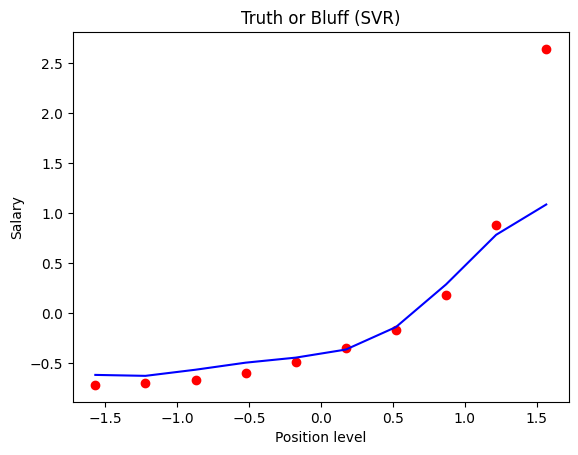

In [8]:
# Step 8: Visualize the results
# We plot the original data points and the SVR regression line for visualization.
plt.scatter(X, Y, color='red')  # Actual salaries
plt.plot(X, regressor.predict(X), color='blue')  # Predicted salaries
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
